In [49]:
import xarray as xr
adir = 'F:/data/cruise_data/saildrone/baja-2018/adcp_data/'
adir_out = 'F:/data/cruise_data/saildrone/baja-2018/figs/adcp/'
filename_adcp = adir + 'saildrone-gen_4-baja_2018-ADCP-data.nc'

In [111]:
#create new dataset with bad values masked
ds = xr.open_dataset(filename_adcp)
ds2=ds.where(ds.bt_perc_good > 60)
ds

<xarray.Dataset>
Dimensions:         (beam: 4, cell: 50, time: 8873)
Coordinates:
  * time            (time) datetime64[ns] 2018-04-04T20:57:26.299995392 ...
Dimensions without coordinates: beam, cell
Data variables:
    heading         (time) float64 ...
    pitch           (time) float64 ...
    roll            (time) float64 ...
    depth           (cell, time) float64 ...
    latitude        (time) float64 ...
    longitude       (time) float64 ...
    nav_elatitude   (time) float64 ...
    nav_elongitude  (time) float64 ...
    nav_etime       (time) datetime64[ns] ...
    nav_slatitude   (time) float64 ...
    nav_slongitude  (time) float64 ...
    nav_stime       (time) datetime64[ns] ...
    bt_ampl         (beam, cell, time) float64 ...
    bt_corr         (beam, cell, time) float64 ...
    bt_perc_good    (cell, time) float64 56.0 71.0 43.0 39.0 47.0 60.0 96.0 ...
    u               (cell, time) float64 ...
    v               (cell, time) float64 ...
    w               (ce

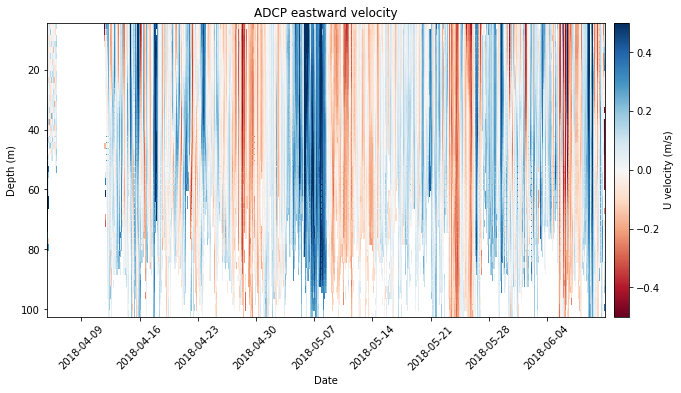

In [108]:
#there are small changes in the depth, ~0.1 m which are ignored in this figure for plotting purposes
X,Y = np.meshgrid(ds.time[:],ds.depth[:,1])

fig = plt.figure(figsize=(10, 6))
plt.gcf().subplots_adjust(bottom=0.2)
ax = fig.add_subplot(111)
ax.set_title('ADCP eastward velocity')
#mask = ds.bt_perc_good<60
#ds[mask]=np.nan
#uspd = ds.u
plt.pcolormesh(X,Y,ds2.u,vmin=-.5,vmax=.5,cmap=plt.get_cmap('RdBu'))
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.ylabel('Depth (m)')
plt.xlabel('Date')
cax = fig.add_axes([0.25, 0.2, 0.78, 0.68])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical', label='U velocity (m/s)')
plt.savefig(adir_out + 'adcp_u.png')


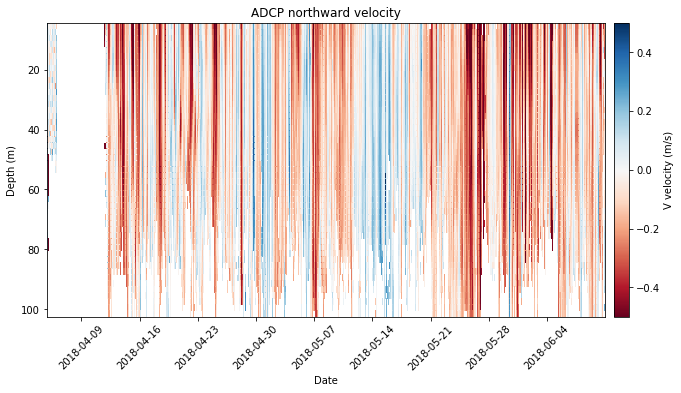

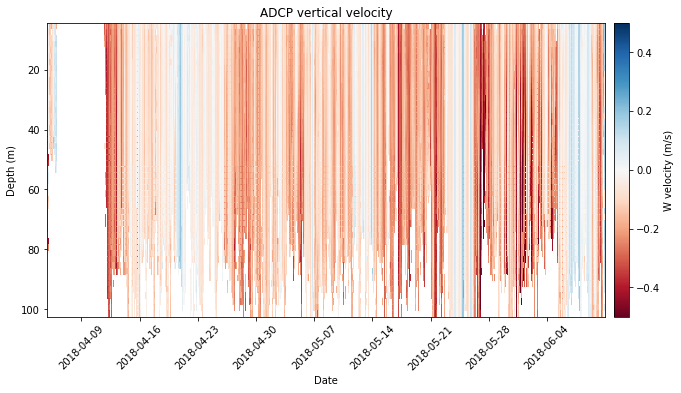

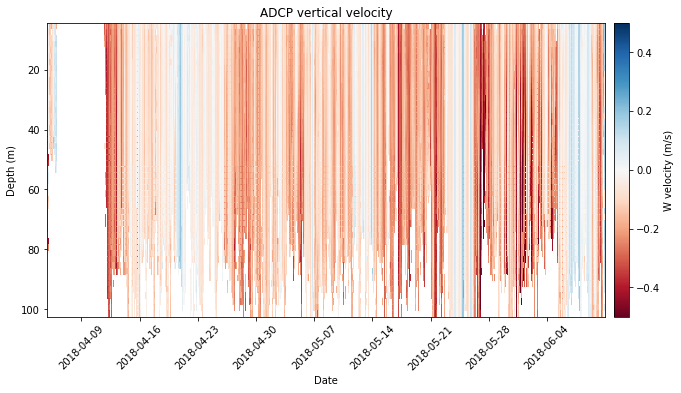

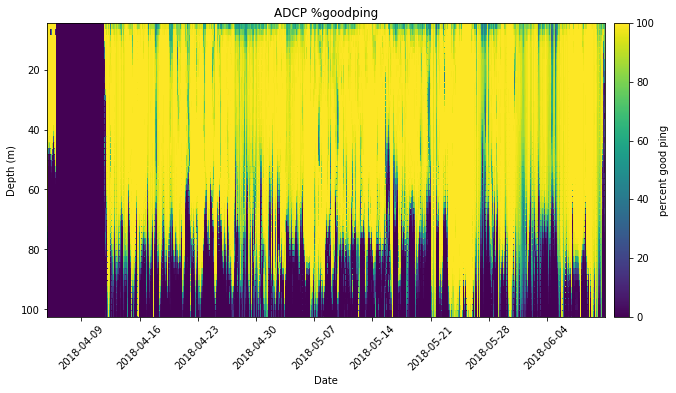

In [109]:
fig = plt.figure(figsize=(10, 6))
plt.gcf().subplots_adjust(bottom=0.2)
ax = fig.add_subplot(111)
ax.set_title('ADCP northward velocity')
plt.pcolormesh(X,Y,ds2.v,vmin=-.5,vmax=.5,cmap=plt.get_cmap('RdBu'))
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.ylabel('Depth (m)')
plt.xlabel('Date')
cax = fig.add_axes([0.25, 0.2, 0.78, 0.68])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical', label='V velocity (m/s)')
plt.savefig(adir_out + 'adcp_v.png')

fig = plt.figure(figsize=(10, 6))
plt.gcf().subplots_adjust(bottom=0.2)
ax = fig.add_subplot(111)
ax.set_title('ADCP vertical velocity')
plt.pcolormesh(X,Y,ds2.w,vmin=-.5,vmax=.5,cmap=plt.get_cmap('RdBu'))
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.ylabel('Depth (m)')
plt.xlabel('Date')
cax = fig.add_axes([0.25, 0.2, 0.78, 0.68])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical', label='W velocity (m/s)')
plt.savefig(adir_out + 'adcp_w.png')

fig = plt.figure(figsize=(10, 6))
plt.gcf().subplots_adjust(bottom=0.2)
ax = fig.add_subplot(111)
ax.set_title('ADCP vertical velocity')
plt.pcolormesh(X,Y,ds2.w,vmin=-.5,vmax=.5,cmap=plt.get_cmap('RdBu'))
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.ylabel('Depth (m)')
plt.xlabel('Date')
cax = fig.add_axes([0.25, 0.2, 0.78, 0.68])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical', label='W velocity (m/s)')
plt.savefig(adir_out + 'adcp_w.png')

fig = plt.figure(figsize=(10, 6))
plt.gcf().subplots_adjust(bottom=0.2)
ax = fig.add_subplot(111)
ax.set_title('ADCP %goodping')
plt.pcolormesh(X,Y,ds.bt_perc_good,vmin=0,vmax=100)
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.ylabel('Depth (m)')
plt.xlabel('Date')
cax = fig.add_axes([0.25, 0.2, 0.78, 0.68])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical', label='percent good ping')
plt.savefig(adir_out + 'adcp_ping.png')


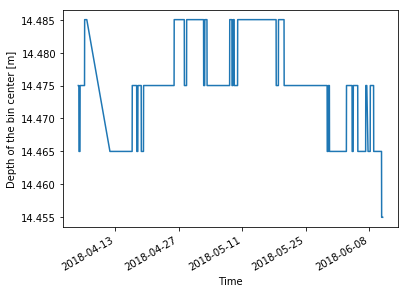

In [14]:
ds.depth[5,:].plot()